In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def extract_data_from_npz(npz_path):
    # This function opens an npz file and extracts two pieces of information.
    # You need to replace 'key1' and 'key2' with the actual keys you're interested in.
    with np.load(npz_path) as data:
        info1 = data['poisson']
        info2 = data['perturbation']

    return info1, info2

def find_and_extract_npz(root_path):
    # Initialize lists to store the extracted information
    info1_list = []
    info2_list = []

    
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if file.endswith('.npz'):
                npz_path = os.path.join(root, file)
                info1, info2 = extract_data_from_npz(npz_path)
                
                # Append the extracted information to the lists
                info1_list.append(info1)
                info2_list.append(info2)

                
    # At this point, info1_list and info2_list contain all the extracted information
    # You can return them, save them, or process them further as needed
    return info1_list, info2_list, info3_list

# Replace 'your/root/directory/path' with the path to the directory you want to start from
root_path = './'
info1_list, info2_list = find_and_extract_npz(root_path)

# Concatenate the lists so each of the first entries becomes different columns
for info1, info2, info3 in zip(info1_list, info2_list):
    print(f"{info1}, {info2}")



NameError: name 'info3_list' is not defined

In [3]:
perturbation_list = [0.1, 0.2, 0.5, 0.8, 1.0, 1.5, 1.8, 2.0, 2.3, 2.5]

results = []
for perturbation in perturbation_list:
    for i in range(5):
        file = np.load(str(perturbation)+'/'+str(i)+'.npz')
        if file['poisson'] >-99 :
            results.append([perturbation, file['poisson'], file['exit_flag']])
        
    
results = np.array(results)
print(results)

[[ 0.1        -0.63911138  1.        ]
 [ 0.1        -0.35130052  1.        ]
 [ 0.1        -0.67850062  0.        ]
 [ 0.1        -0.27256581  1.        ]
 [ 0.1        -0.2693521   1.        ]
 [ 0.2        -0.36551315  1.        ]
 [ 0.2        -0.80646424  0.        ]
 [ 0.2        -0.54095484  1.        ]
 [ 0.2        -0.69506267  1.        ]
 [ 0.2        -0.28000711  1.        ]
 [ 0.5        -0.49137466  1.        ]
 [ 0.5        -0.73400322  1.        ]
 [ 0.5        -0.62802216  1.        ]
 [ 0.5        -0.45160677  1.        ]
 [ 0.5        -0.53047661  1.        ]
 [ 0.8        -0.4525641   1.        ]
 [ 0.8        -0.67686952  1.        ]
 [ 0.8        -0.40743821  1.        ]
 [ 0.8        -0.25320163  1.        ]
 [ 0.8        -0.53004704  0.        ]
 [ 1.         -0.44018259  1.        ]
 [ 1.         -0.77552726  1.        ]
 [ 1.         -0.40633831  1.        ]
 [ 1.         -0.42636935  1.        ]
 [ 1.         -0.51565826  0.        ]
 [ 1.5        -0.39839176

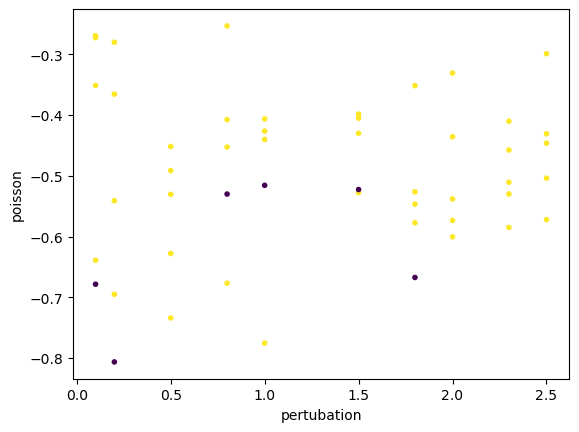

In [6]:
plt.scatter(results[:,0],results[:,1], c=results[:,2], marker='.')
#plt.ylim(-0.25,0)
plt.xlabel('pertubation')
plt.ylabel('poisson')
#plt.gca().set_aspect(10, adjustable='box')

plt.savefig('results.jpg')
plt.show()

/home/bylehn/ipykernel_1934437/4294557544.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')


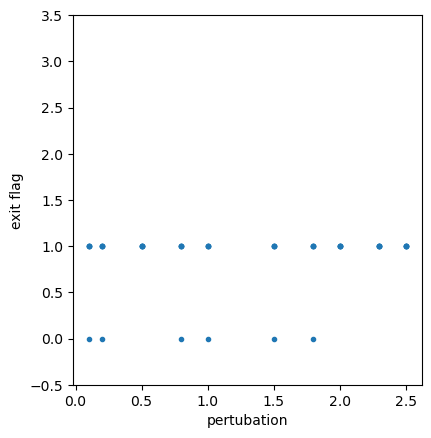

In [7]:
plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')
plt.ylim(-0.5 , 3.5)
plt.xlabel('pertubation')
plt.ylabel('exit flag')
plt.gca().set_aspect(0.7, adjustable='box')

plt.savefig('exit flags.jpg')
plt.show()